In [3]:

"""
利用可能な最適化手法
"SLSQP" (Sequential Least Squares Programming):

制約付き非線形最適化に適している
勾配情報を使用
デフォルトの手法
"L-BFGS-B" (Limited-memory BFGS with Bounds):

大規模な最適化問題に適している
境界制約のみをサポート
メモリ効率が良い
"COBYLA" (Constrained Optimization BY Linear Approximation):

勾配を必要としない
非線形制約をサポート
ロバストだが収束が遅い場合がある
"trust-constr" (Trust Region Constrained):

より高度な制約付き最適化
二次収束性を持つ
計算コストが高い
"Nelder-Mead":

勾配を必要としない
単純シンプレックス法
制約なし最適化向け
推奨される使用場面
制約付き最適化: "SLSQP" または "trust-constr"
大規模問題: "L-BFGS-B"
勾配計算が困難: "COBYLA" または "Nelder-Mead"
これらの手法は scipy.optimize.minimize の実装を使用しています。
"""

'\n利用可能な最適化手法\n"SLSQP" (Sequential Least Squares Programming):\n\n制約付き非線形最適化に適している\n勾配情報を使用\nデフォルトの手法\n"L-BFGS-B" (Limited-memory BFGS with Bounds):\n\n大規模な最適化問題に適している\n境界制約のみをサポート\nメモリ効率が良い\n"COBYLA" (Constrained Optimization BY Linear Approximation):\n\n勾配を必要としない\n非線形制約をサポート\nロバストだが収束が遅い場合がある\n"trust-constr" (Trust Region Constrained):\n\nより高度な制約付き最適化\n二次収束性を持つ\n計算コストが高い\n"Nelder-Mead":\n\n勾配を必要としない\n単純シンプレックス法\n制約なし最適化向け\n推奨される使用場面\n制約付き最適化: "SLSQP" または "trust-constr"\n大規模問題: "L-BFGS-B"\n勾配計算が困難: "COBYLA" または "Nelder-Mead"\nこれらの手法は scipy.optimize.minimize の実装を使用しています。\n'

In [5]:
from botorch.test_functions import Ackley, Branin
import torch
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch import fit_gpytorch_mll
from botorch.optim import optimize_acqf
from botorch.acquisition import qExpectedImprovement
import numpy as np
import matplotlib.pyplot as plt
from botorch.utils.transforms import unnormalize

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:194: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403212643/work/aten/src/ATen/native/ReduceOps.cpp:1760.)
  Ymean, Ystd = torch.mean(Y, dim=-2), torch.std(Y, dim=-2)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-2.6937], dtype=torch.float64), std = tensor([nan], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationW

candidates: tensor([0.5864, 0.2233])


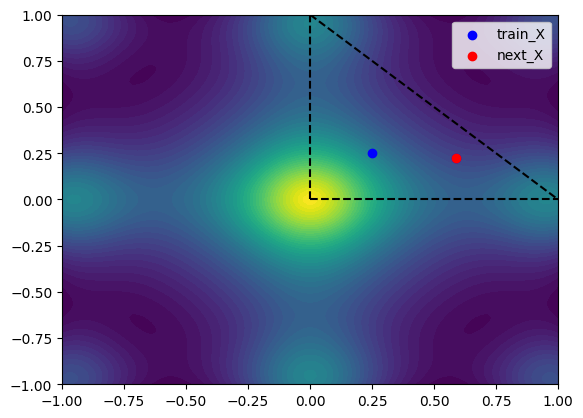

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.2009], dtype=torch.float64), std = tensor([0.7172], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.1806, 0.5626])


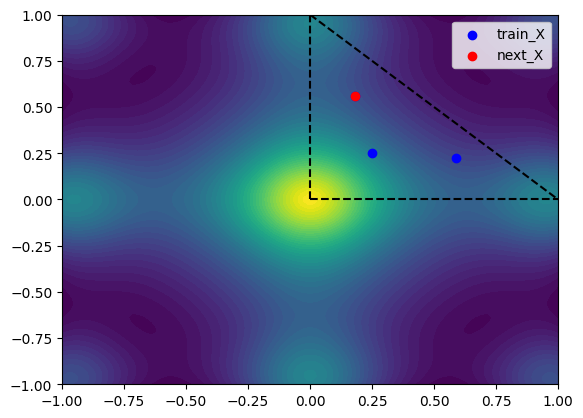

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.3151], dtype=torch.float64), std = tensor([0.5444], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.3575, 0.1510])


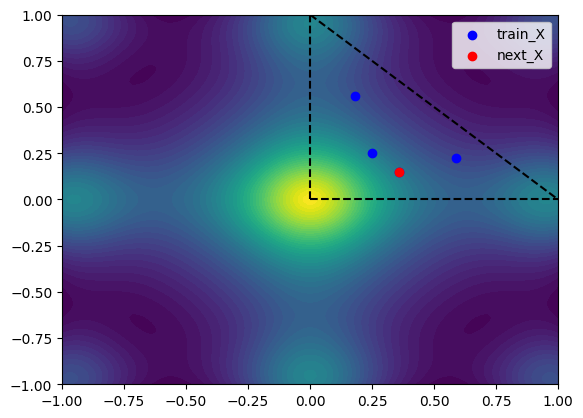

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.1882], dtype=torch.float64), std = tensor([0.5118], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.1544, 0.3978])


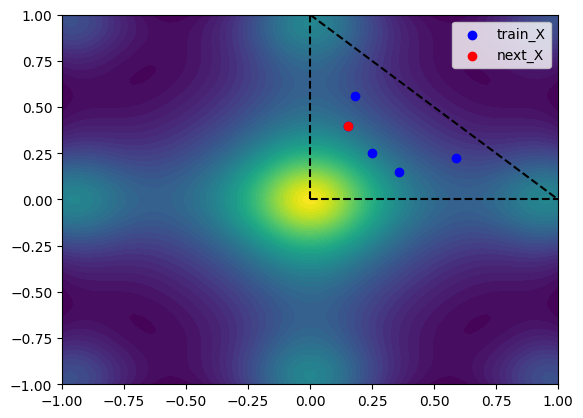

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.1506], dtype=torch.float64), std = tensor([0.4511], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.2906, 0.4434])


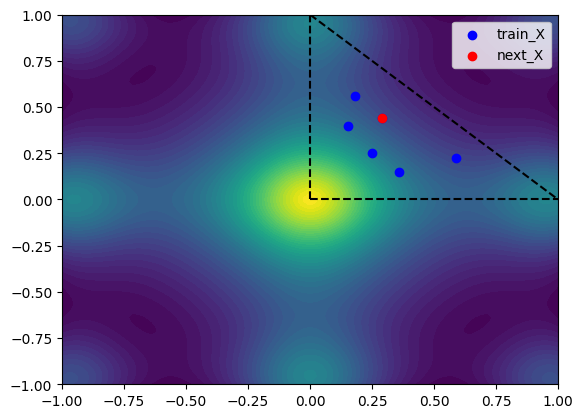

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.2274], dtype=torch.float64), std = tensor([0.4452], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.2179, 0.4889])


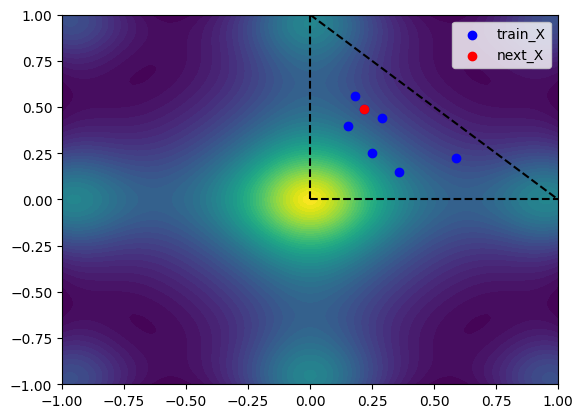

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.2671], dtype=torch.float64), std = tensor([0.4197], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.5469, 0.4287])


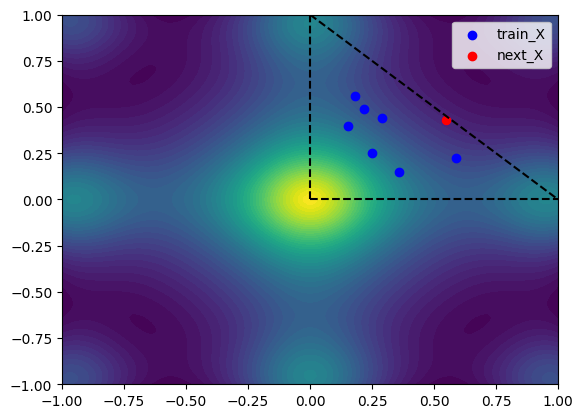

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.3831], dtype=torch.float64), std = tensor([0.5086], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.4227, 0.5695])


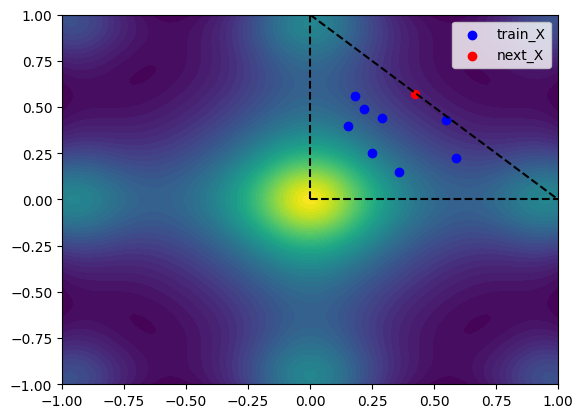

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.4759], dtype=torch.float64), std = tensor([0.5513], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.6076, 0.3000])


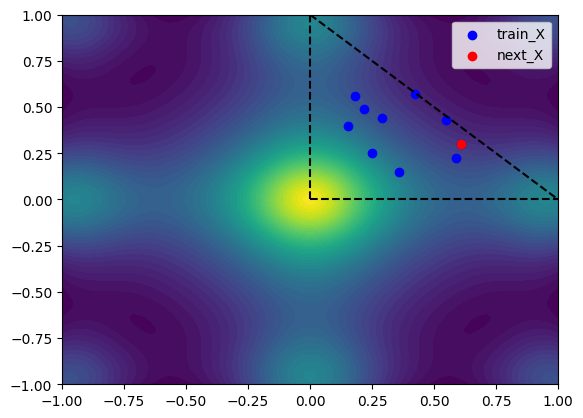

/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([-3.5249], dtype=torch.float64), std = tensor([0.5423], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/yusaku/opt/anaconda3/envs/bo/lib/python3.11/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.'), Optimi

candidates: tensor([0.1457, 0.3180])


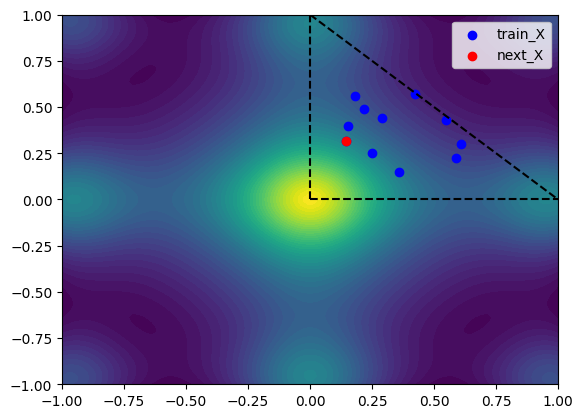

In [2]:
func = Ackley(negate=True)
bounds  = torch.tensor([[-1.,-1.],[1.,1.]])
train_X = torch.tensor([[0.25, 0.25]], dtype=torch.float64)
#train_X = bounds[0].unsqueeze(0) + torch.rand(1,2,dtype=torch.float64)
train_y = func(train_X).unsqueeze(-1)

iteration = 10
#train_X = unnormalize(train_X, bounds)

for iter in range(1, iteration + 1):
    model = SingleTaskGP(train_X, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    qEI = qExpectedImprovement(model, train_y.max())


    # 制約領域内の初期点を生成
    batch_initial_conditions = torch.rand(100, 1, 2)  # [0,1]の範囲でランダム生成
    # 制約を満たすように調整
    mask = ((batch_initial_conditions.sum(-1) <= 1.0) & 
            (batch_initial_conditions[...,0] >= 0) & 
            (batch_initial_conditions[...,1] >= 0))
    batch_initial_conditions = batch_initial_conditions[mask]

    candidates, _ = optimize_acqf(
        acq_function=qEI,
        bounds=bounds,
        q=5,
        num_restarts=20,  # より多くの再スタートを試行
        raw_samples=512,  # サンプル数を増やして探索範囲を広げる
        inequality_constraints=[
            (torch.tensor([0, 1]), torch.tensor([1.0, 1.0]), 1.0),  # x0 + x1 <= 1
            (torch.tensor([0]), torch.tensor([-1.0]), 0.0),  # x0 >= 0
            (torch.tensor([1]), torch.tensor([-1.0]), 0.0),  # x1 >= 0
        ],
        batch_initial_conditions=batch_initial_conditions,
        options={
            "batch_limit": 5,
            "maxiter": 50000,  # イテレーション数を増やす
            "ftol": 1e-8,   # より厳密な収束条件
            "method": "SLSQP",  # 制約付き最適化に適したメソッド
        }
    )
    print("candidates:",candidates)
    # candidatesに必要な次元を追加
    if candidates.dim() == 1:
        candidates = candidates.unsqueeze(0)  # バッチ次元の追加

    train_X = torch.cat([train_X, candidates], dim=-2)
    train_y = torch.cat([train_y, func(candidates).unsqueeze(-1)], dim=-2)

    # Calculate next_X
    next_X = candidates

    # Plotting the contour of the Ackley function
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    #x = np.linspace(bounds[0, 0].item(), bounds[1, 0].item(), 100)
    #y = np.linspace(bounds[0, 1].item(), bounds[1, 1].item(), 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[func(torch.tensor([[xx, yy]], dtype=torch.float64)).item() for xx in x] for yy in y])

    # Plotting the constraint x0 > 0, x1 > 0, x0 + x1 < 3
    constraint_x = np.linspace(0, 1, 100)
    constraint_y1 = np.zeros_like(constraint_x)
    constraint_y2 = 1 - constraint_x

    plt.plot(constraint_x, constraint_y1, 'k--')
    plt.plot(constraint_y1, constraint_x, 'k--')
    plt.plot(constraint_x, constraint_y2, 'k--')
    plt.fill_between(constraint_x, constraint_y1, constraint_y2, where=(constraint_x + constraint_y2 <= 3), color='gray', alpha=0.3)

    plt.contourf(X, Y, Z, levels=50)
    plt.scatter(train_X[:, 0].numpy(), train_X[:, 1].numpy(), color='blue', label='train_X')
    plt.scatter(next_X[:, 0].numpy(), next_X[:, 1].numpy(), color='red', label='next_X')
    plt.legend()
    plt.show()
